In [ ]:
import pandas as pd
import numpy as np

purchase_data = pd.read_excel('/content/Lab Session1 Data.xlsx', sheet_name='Purchase data')
purchase_df = pd.DataFrame(purchase_data)
purchase_df.drop(purchase_df.iloc[:, 5:25], axis=1, inplace=True)
print(purchase_df)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198


In [ ]:
A_data = purchase_df.iloc[0:10,1:4]
print(A_data)
A_matrix = np.array(A_data)
print(A_matrix)
C_data = purchase_df.iloc[0:10,4]
print(C_data)
C_matrix = np.array(C_data)
C_matrix = C_matrix.reshape(10,1)
print(C_matrix)

   Candies (#)  Mangoes (Kg)  Milk Packets (#)
0           20             6                 2
1           16             3                 6
2           27             6                 2
3           19             1                 2
4           24             4                 2
5           22             1                 5
6           15             4                 2
7           18             4                 2
8           21             1                 4
9           16             2                 4
[[20  6  2]
 [16  3  6]
 [27  6  2]
 [19  1  2]
 [24  4  2]
 [22  1  5]
 [15  4  2]
 [18  4  2]
 [21  1  4]
 [16  2  4]]
0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64
[[386]
 [289]
 [393]
 [110]
 [280]
 [167]
 [271]
 [274]
 [148]
 [198]]


In [ ]:
purchase_df.shape
print('1. The dimensionality of the vector space of this data is: {}'.format(purchase_df.shape))

1. The dimensionality of the vector space of this data is: (10, 5)


In [ ]:
print('2. The number of vectors existing in this vector space is: {}'.format(purchase_df.shape[0]))

2. The number of vectors existing in this vector space is: 10


In [ ]:
print('3. The rank of Matrix A is: {}'.format(np.linalg.matrix_rank(A_data)))

3. The rank of Matrix A is: 3


In [ ]:
pseudo_inverseA = np.linalg.pinv(A_matrix)
print(pseudo_inverseA)
print('A2. To calculate the model vector X for predicting the cost of the products available with the vendors:')
X = np.dot(pseudo_inverseA, C_matrix)
print(C_matrixX)
print('4. Cost of each product available for sale is:')
print('a) Candy: {}'.format(X[0]))
print('b) Mango: {}'.format(X[1]))
print('c) Milk Packet: {}'.format(X[2]))

[[-0.01008596 -0.03124505  0.01013951  0.0290728   0.0182907   0.01161794
  -0.00771348  0.00095458  0.01743623 -0.00542016]
 [ 0.09059668  0.07263726  0.03172933 -0.09071908 -0.01893196 -0.06926996
   0.05675464  0.03152577 -0.07641966  0.00357352]
 [ 0.00299878  0.15874243 -0.05795468 -0.06609024 -0.06295043  0.03348017
   0.01541831 -0.01070461  0.00029003  0.05938755]]
A2. To calculate the model vector X for predicting the cost of the products available with the vendors:
[[ 1.]
 [55.]
 [18.]]
4. Cost of each product available for sale is:
a) Candy: [1.]
b) Mango: [55.]
c) Milk Packet: [18.]


In [ ]:
print('A3. Developed a classifier mocdel to categorize customers based on purchase behaviour:')
newpurchase_df = purchase_df.copy()
customer_status = []

for row in purchase_df['Payment (Rs)']:
  if row > 200:
    customer_status.append('RICH')
  else:
    customer_status.append('POOR')
newpurchase_df['Status'] = customer_status
print(newpurchase_df)

A3. Developed a classifier mocdel to categorize customers based on purchase behaviour:
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs) Status
0      C_1           20             6                 2           386   RICH
1      C_2           16             3                 6           289   RICH
2      C_3           27             6                 2           393   RICH
3      C_4           19             1                 2           110   POOR
4      C_5           24             4                 2           280   RICH
5      C_6           22             1                 5           167   POOR
6      C_7           15             4                 2           271   RICH
7      C_8           18             4                 2           274   RICH
8      C_9           21             1                 4           148   POOR
9     C_10           16             2                 4           198   POOR


In [ ]:
IRCTC_data = pd.read_excel('/content/Lab Session1 Data.xlsx', sheet_name='IRCTC Stock Price')
IRCTC_df = pd.DataFrame(IRCTC_data)
print(IRCTC_df)

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

In [ ]:
price_data = IRCTC_df.iloc[0:250,3]
print(price_data)
price_matrix = np.array(price_data)
print(price_matrix)

0      2081.85
1      2077.75
2      2068.85
3      2072.95
4      2078.25
        ...   
244    1397.40
245    1400.75
246    1405.10
247    1412.35
248    1363.05
Name: Price, Length: 249, dtype: float64
[2081.85 2077.75 2068.85 2072.95 2078.25 2083.   2076.85 2011.7  2050.4
 2089.95 2097.95 2064.4  2093.75 2106.35 2071.2  2144.85 2094.8  1921.7
 1921.8  1917.95 1894.6  1903.2  1896.25 1928.35 1894.05 1907.95 1884.5
 1862.   1855.65 1858.1  1835.05 1762.1  1747.65 1746.6  1792.3  1748.65
 1693.4  1725.2  1723.65 1770.2  1765.55 1791.4  1792.55 1795.85 1793.2
 1730.85 1712.   1673.05 1640.05 1612.7  1627.45 1608.1  1611.65 1582.
 1730.9  1726.4  1709.   1688.55 1702.65 1751.75 1757.   1755.25 1747.4
 1721.85 1760.55 1842.15 1838.05 1855.45 1766.65 1824.   1904.05 1947.05
 1987.35 2018.5  2026.7  2015.45 1940.85 1961.1  1886.1  1897.65 1938.45
 1759.65 1726.95 1675.45 1632.9  1615.85 1675.4  1701.2  1698.65 1674.15
 1713.1  1731.9  1619.   1618.4  1641.75 1618.7  1555.   1518.9  1469.3

In [ ]:
import statistics
IRCTCprice_mean = statistics.mean(IRCTC_data["Price"])
print('The mean of the Price data present in column D is: {}'.format(IRCTCprice_mean))

The mean of the Price data present in column D is: 1560.663453815261


In [ ]:
IRCTCprice_variance = statistics.variance(IRCTC_data["Price"])
print('The variance of the Price data present in column D is: {}'.format(IRCTCprice_variance))

The variance of the Price data present in column D is: 58732.365352539186


In [ ]:
Wednesday_data = IRCTC_data[IRCTC_data["Day"]=="Wed"]
Wednesday_mean = statistics.mean(Wednesday_data["Price"])
print('The calculated sample mean for all Wednesdays is: {}'.format(Wednesday_mean))

The calculated sample mean for all Wednesdays is: 1550.706


In [ ]:
print('After comparing the mean with the population mean we can observe that the IRCTC sales on Wednesdays are less compared to the mean of everyday')

After comparing the mean with the population mean we can observe that the IRCTC sales on Wednesdays are less compared to the mean of everyday


In [ ]:
Apr_data = IRCTC_data[IRCTC_data["Month"]=="Apr"]
Apr_mean = statistics.mean(Apr_data["Price"])
print('The calculated sample mean for the month of April is: {}'.format(Apr_mean))

The calculated sample mean for all months of April is: 1698.9526315789474


In [ ]:
print('After comparing the mean with population mean we can obtain that the IRCTC sales on the month April is significantly greater than the mean of all the months.')

After comparing the mean with population mean we can obtain that the IRCTC sales on the month April is significantly greater than the mean of all the months.


In [ ]:
negative_values = 0
for index, row in IRCTC_data.iterrows():
  if row['Chg%'] < 0:
    negative_values = negative_values + 1
print('Probability of making a loss over the stock is: {}'.format(negative_values/IRCTC_data.shape[0]))

Probability of making a loss over the stock is: 0.4979919678714859


In [ ]:
wednesday = 0
profit = 0
for index, row in IRCTC_data.iterrows():
  if row['Day']=="Wed":
    if row['Chg%'] > 0:
      profit = profit + 1
    wednesday = wednesday + 1
print('Probability of making a profit on Wednesday: {}'.format(profit/wednesday))

Probability of making a profit on Wednesday: 0.42


<function matplotlib.pyplot.show(close=None, block=None)>

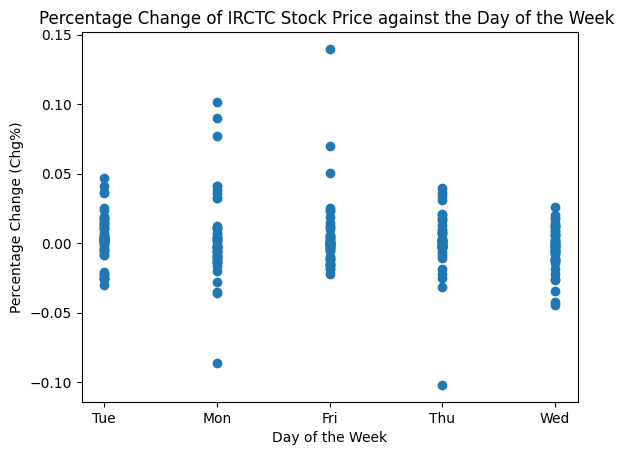

In [ ]:
import matplotlib.pyplot as plt

data_on_days = []
data_on_chg = []
for index, row in IRCTC_data.iterrows():
  data_on_days.append(row['Day'])
  data_on_chg.append(row['Chg%'])

plt.scatter(data_on_days, data_on_chg)
plt.title("Percentage Change of IRCTC Stock Price against the Day of the Week ")
plt.ylabel("Percentage Change (Chg%)")
plt.xlabel("Day of the Week")
plt.show